In [ ]:
# See E. Peterfreund, O. Lindenbaum, F. Dietrich, T. Bertalan, M. Gavish, I.G. Kevrekidis and R.R. Coifman,
# "LOCA: LOcal Conformal Autoencoder for standardized data coordinates",
# https://www.pnas.org/doi/full/10.1073/pnas.2014627117
#
#
# -----------------------------------------------------------------------------
# Author: Erez Peterfreund , Ofir Lindenbaum
#         erezpeter@gmail.com  , ofir.lindenbaum@yale.edu , 2020
# 
# This program is free software: you can redistribute it and/or modify it under
# the terms of the GNU General Public License as published by the Free Software
# Foundation, either version 3 of the License, or (at your option) any later
# version.
#
# This program is distributed in the hope that it will be useful, but WITHOUT
# ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS
# FOR A PARTICULAR PURPOSE.  See the GNU General Public License for more
# details.
#
# You should have received a copy of the GNU General Public License along with
# this program.  If not, see <http://www.gnu.org/licenses/>.
# -----------------------------------------------------------------------------

In [13]:
# import necessary packages 
import scipy

import numpy as np
import matplotlib.pyplot as plt

from utils import *
from Loca import *

# Generate data and divide into train and validation

In [18]:
def generate_x(n=900, additionalPointPerSample= None, additionalPointsStd=1e-2):
    x= np.random.uniform(0,1,(n,2))
    if additionalPointPerSample is not None:
        additionalDataX= x.reshape((n,1,2)).repeat(additionalPointPerSample,axis=1)
        
        noise = np.random.randn(n,additionalPointPerSample,2)*additionalPointsStd

        additionalDataX+=noise
        return x,additionalDataX
    return x

In [19]:
def non_linear_function(x):
    y= np.zeros(x.shape)
    
    
    y[...,0]= x[...,0]+x[...,1]**3
    y[...,1]= x[...,1]-x[...,0]**3
        
    return y
    

In [20]:
N=2000
M= 200
n_std=0.01

x,additionalDataX=generate_x(n=N,additionalPointPerSample=M,additionalPointsStd=n_std)
y=non_linear_function(x)
additionalDataY=non_linear_function(additionalDataX)

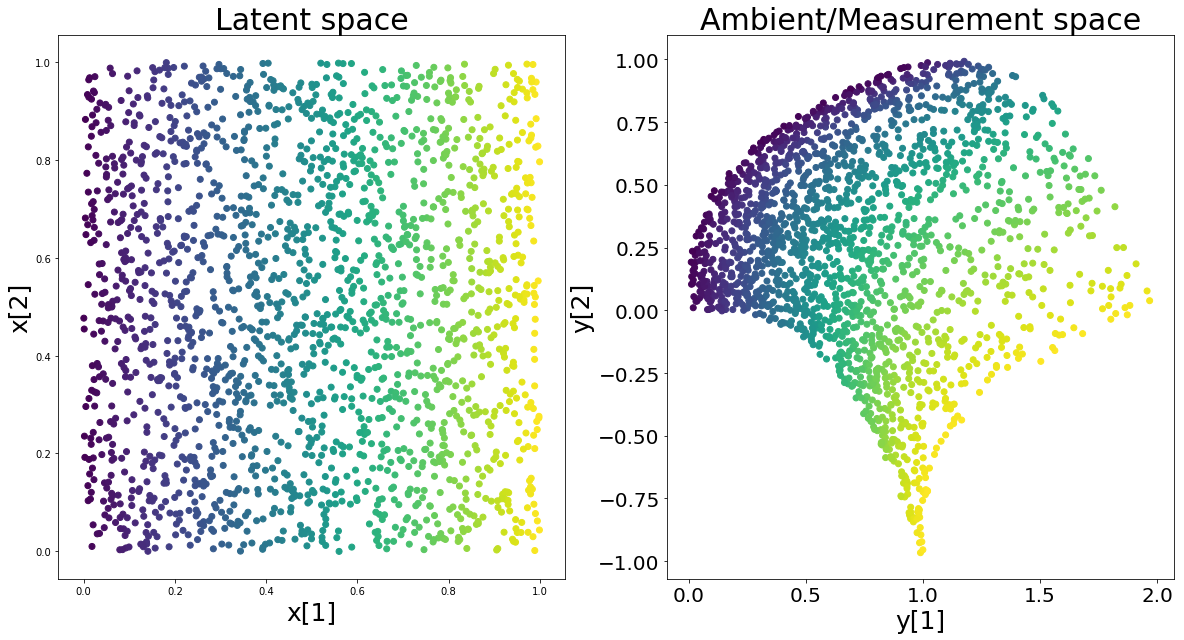

In [21]:
f,ax= plt.subplots(1,2,figsize=(20,10))
ax[0].scatter(x[:,0],x[:,1],c=x[:,0])
ax[0].set_xlabel('x[1]',fontsize=25)
ax[0].set_ylabel('x[2]',fontsize=25)
ax[0].set_title('Latent space',fontsize=30)

ax[1].scatter(y[:,0],y[:,1],c=x[:,0])
ax[1].set_xlabel('y[1]',fontsize=25)
ax[1].set_ylabel('y[2]',fontsize=25)
ax[1].set_title('Ambient/Measurement space',fontsize=30)


plt.tick_params(labelsize=20)


In [22]:
# Divide into train and validation
indexes = np.random.permutation(N)
indexes_train, indexes_val = indexes[:N*9//10], indexes[N*9//10:]

data_train = additionalDataY[indexes_train,:,:]
data_val = additionalDataY[indexes_val,:,:]

# Define and train the neural net

In [23]:
amount_epochs=10000
params = {}
params['encoder_layers']=[2,50,50,2,2]
params['decoder_layers']=[2,50,50,2,2]

params['activation_enc']='tanh'
params['activation_dec']='l_relu'

params['clouds_var']= n_std**2

In [7]:
batch_size=200
lrs= [1e-3,3e-4,1e-4]


model = Loca(**params) 

for lr in lrs:
    model.train( data_train,amount_epochs,lr=lr, batch_size=batch_size, data_val=data_val, evaluate_every=100,verbose=True)

Epoch: 0100 Train : white= 1.47845 rec=0.18837      Val: : white= 1.48127 rec=0.21199
Epoch: 0200 Train : white= 1.44187 rec=0.16046      Val: : white= 1.44487 rec=0.18500
Epoch: 0300 Train : white= 1.43726 rec=0.15876      Val: : white= 1.44437 rec=0.18344
Epoch: 0400 Train : white= 1.41342 rec=0.15853      Val: : white= 1.42288 rec=0.18341
Epoch: 0500 Train : white= 1.37866 rec=0.15849      Val: : white= 1.39130 rec=0.18354
Epoch: 0600 Train : white= 1.34583 rec=0.15837      Val: : white= 1.36231 rec=0.18354
Epoch: 0700 Train : white= 1.30916 rec=0.15782      Val: : white= 1.32875 rec=0.18308
Epoch: 0800 Train : white= 1.25834 rec=0.15405      Val: : white= 1.27524 rec=0.17899
Epoch: 0900 Train : white= 1.26191 rec=0.15678      Val: : white= 1.26469 rec=0.18060
Epoch: 1000 Train : white= 1.37025 rec=0.15231      Val: : white= 1.36814 rec=0.17416
Epoch: 1100 Train : white= 1.34147 rec=0.15311      Val: : white= 1.32323 rec=0.17232
Epoch: 1200 Train : white= 0.61614 rec=0.01513      Va

Epoch: 9700 Train : white= 0.03212 rec=0.00017      Val: : white= 0.03528 rec=0.00017
Epoch: 9800 Train : white= 0.03071 rec=0.00025      Val: : white= 0.03389 rec=0.00024
Epoch: 9900 Train : white= 0.03061 rec=0.00065      Val: : white= 0.03387 rec=0.00064
Epoch: 10000 Train : white= 0.03104 rec=0.00015      Val: : white= 0.03426 rec=0.00017
Epoch: 10100 Train : white= 0.03029 rec=0.00004      Val: : white= 0.03347 rec=0.00004
Epoch: 10200 Train : white= 0.03035 rec=0.00003      Val: : white= 0.03349 rec=0.00004
Epoch: 10300 Train : white= 0.03039 rec=0.00003      Val: : white= 0.03343 rec=0.00003
Epoch: 10400 Train : white= 0.03044 rec=0.00003      Val: : white= 0.03360 rec=0.00003
Epoch: 10500 Train : white= 0.03047 rec=0.00003      Val: : white= 0.03371 rec=0.00004
Epoch: 10600 Train : white= 0.03051 rec=0.00008      Val: : white= 0.03375 rec=0.00008
Epoch: 10700 Train : white= 0.03056 rec=0.00003      Val: : white= 0.03387 rec=0.00003
Epoch: 10800 Train : white= 0.03055 rec=0.0000

Epoch: 19200 Train : white= 0.03023 rec=0.00002      Val: : white= 0.03350 rec=0.00002
Epoch: 19300 Train : white= 0.03022 rec=0.00003      Val: : white= 0.03349 rec=0.00002
Epoch: 19400 Train : white= 0.03021 rec=0.00003      Val: : white= 0.03348 rec=0.00003
Epoch: 19500 Train : white= 0.03022 rec=0.00002      Val: : white= 0.03352 rec=0.00002
Epoch: 19600 Train : white= 0.03025 rec=0.00003      Val: : white= 0.03343 rec=0.00002
Epoch: 19700 Train : white= 0.03026 rec=0.00002      Val: : white= 0.03343 rec=0.00002
Epoch: 19800 Train : white= 0.03021 rec=0.00003      Val: : white= 0.03356 rec=0.00002
Epoch: 19900 Train : white= 0.03024 rec=0.00003      Val: : white= 0.03357 rec=0.00003
Epoch: 20000 Train : white= 0.03028 rec=0.00002      Val: : white= 0.03350 rec=0.00002
Epoch: 20100 Train : white= 0.03005 rec=0.00002      Val: : white= 0.03301 rec=0.00002
Epoch: 20200 Train : white= 0.03007 rec=0.00002      Val: : white= 0.03302 rec=0.00002
Epoch: 20300 Train : white= 0.03007 rec=0.0

Epoch: 28700 Train : white= 0.03016 rec=0.00002      Val: : white= 0.03370 rec=0.00002
Epoch: 28800 Train : white= 0.03016 rec=0.00003      Val: : white= 0.03374 rec=0.00003
Epoch: 28900 Train : white= 0.03016 rec=0.00003      Val: : white= 0.03377 rec=0.00003
Epoch: 29000 Train : white= 0.03016 rec=0.00002      Val: : white= 0.03377 rec=0.00002
Epoch: 29100 Train : white= 0.03015 rec=0.00002      Val: : white= 0.03373 rec=0.00002
Epoch: 29200 Train : white= 0.03015 rec=0.00002      Val: : white= 0.03370 rec=0.00002
Epoch: 29300 Train : white= 0.03016 rec=0.00003      Val: : white= 0.03365 rec=0.00003
Epoch: 29400 Train : white= 0.03016 rec=0.00002      Val: : white= 0.03357 rec=0.00002
Epoch: 29500 Train : white= 0.03016 rec=0.00002      Val: : white= 0.03354 rec=0.00002
Epoch: 29600 Train : white= 0.03016 rec=0.00002      Val: : white= 0.03351 rec=0.00002
Epoch: 29700 Train : white= 0.03017 rec=0.00002      Val: : white= 0.03351 rec=0.00002
Epoch: 29800 Train : white= 0.03017 rec=0.0

#  Fig. S1a- Latent and Ambient space

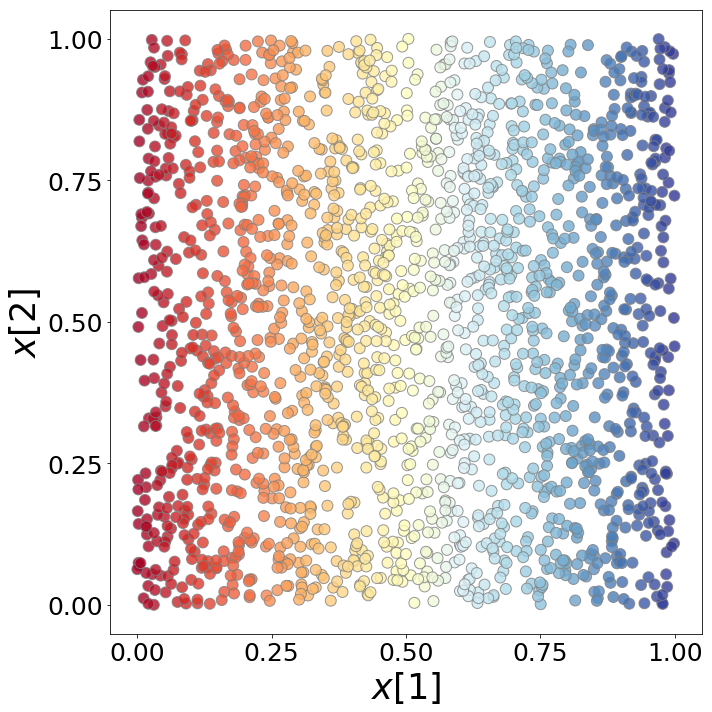

In [8]:
f,ax = plt.subplots(1,1,figsize=(10,10))
plt.tick_params(labelsize=25)
plt.xlabel(r'$x[1]$',fontsize=35)
plt.ylabel(r'$x[2]$',fontsize=35)
plt.locator_params(nbins=5)


ax.scatter(x=x[:,0], y=x[:,1], s=120, c=x[:,0],alpha=0.8,\
           cmap=plt.cm.get_cmap('RdYlBu'),edgecolors= "grey" )


plt.tight_layout()


# Fig 3a - Latent space with clouds

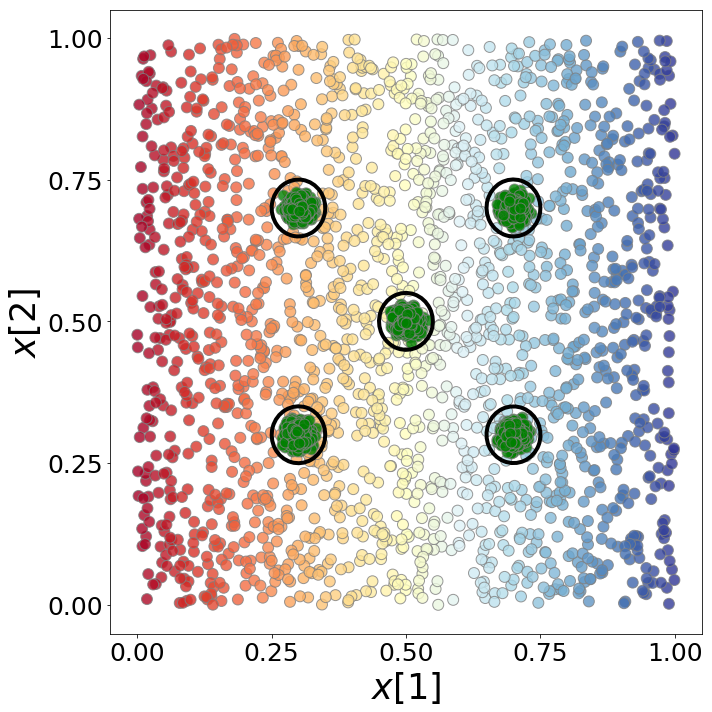

In [25]:
clouds_size=100000
circ_std= n_std #np.sqrt(4e-2)

xCircles = np.zeros((5,clouds_size,2))
listVal= [0.3,0.7]
ind= 0
for i in range(4):
    xCircles[i,:,0]= listVal[i %2]
    xCircles[i,:,1]= listVal[i//2 %2]

xCircles[-1,:,0]= 0.5 
xCircles[-1,:,1]= 0.5 


xCircles+= np.random.randn(5, clouds_size,2)*circ_std

circlesSize= np.zeros((5,2))
circlesAngle= np.zeros(5)
for i in range(5):
    circlesSize[i,:],U = np.linalg.eig(np.cov(xCircles[i,:,:].T))
    circlesAngle[i]= np.arctan2(U[1,0],U[0,0])*360/(2*np.pi)
    
f,ax = plt.subplots(1,1,figsize=(10,10))
plt.tick_params(labelsize=25)
plt.xlabel(r'$x[1]$',fontsize=35)
plt.ylabel(r'$x[2]$',fontsize=35)
plt.locator_params(nbins=5)




coordinates= np.vstack([x, xCircles[:,:1000,:].reshape((-1,2)) ])
coordinates_colors= np.vstack([x[:,[0]], 0.*xCircles[:,:1000,[0]].reshape((-1,1)) ])

ax.scatter(x=x[:,0], y=x[:,1], s=120, c=x[:,0],alpha=0.8,\
           cmap=plt.cm.get_cmap('RdYlBu'),edgecolors= "grey" )


ax.scatter(x=xCircles[:,:1000,0], y=xCircles[:,:1000,1], s=120, c='g',alpha=0.8,\
           edgecolors= "grey" )



from matplotlib.patches import Ellipse
for i in range(5):
    e= Ellipse((np.mean(xCircles[i,:,0]),np.mean(xCircles[i,:,1])), 10*np.sqrt(circlesSize[i,0]), 10*np.sqrt(circlesSize[i,1]), \
               circlesAngle[i],fill=False, linewidth=4)
    e.set_clip_box(ax.bbox)
    ax.add_artist(e)

plt.tight_layout()


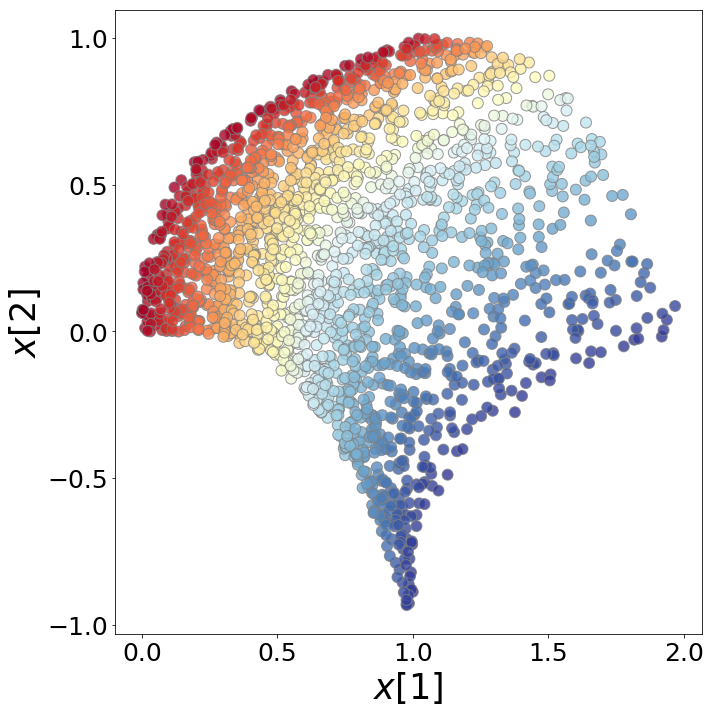

In [10]:
f,ax = plt.subplots(1,1,figsize=(10,10))
plt.tick_params(labelsize=25)
plt.xlabel(r'$y[1]$',fontsize=35)
plt.ylabel(r'$y[2]$',fontsize=35)
plt.locator_params(nbins=5)


ax.scatter(x=y[:,0], y=y[:,1], s=120, c=x[:,0],alpha=0.8,\
           cmap=plt.cm.get_cmap('RdYlBu'),edgecolors= "grey" )


plt.tight_layout()


# Fig 3b- Ambient space with clouds

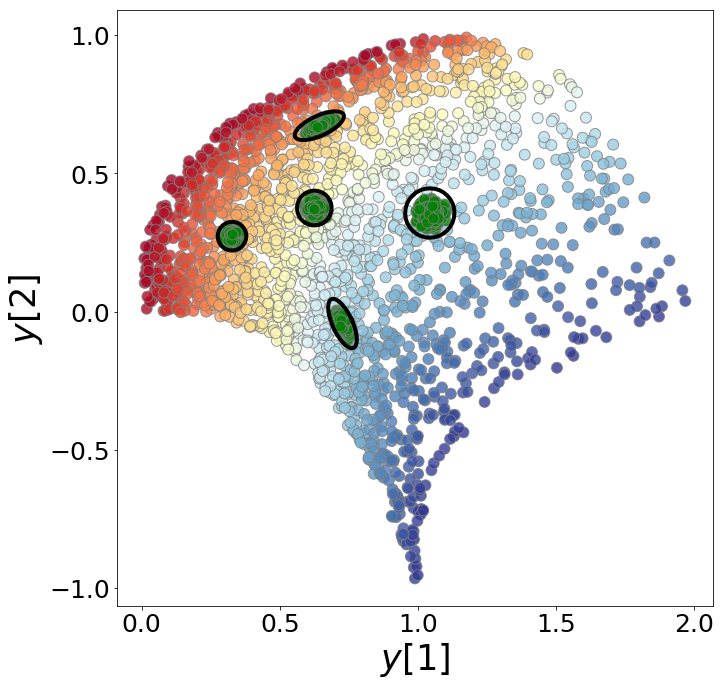

In [26]:
yCircles= non_linear_function(xCircles)


circlesSize= np.zeros((5,2))
circlesAngle= np.zeros(5)
for i in range(5):
    circlesSize[i,:],U = np.linalg.eig(np.cov(yCircles[i,:,:].T))
    circlesAngle[i]= np.arctan2(U[1,0],U[0,0])*360/(2*np.pi)
    
f,ax = plt.subplots(1,1,figsize=(10,10))
plt.tick_params(labelsize=25)
plt.xlabel('$y[1]$',fontsize=35)
plt.ylabel('$y[2]$',fontsize=35)
plt.locator_params(nbins=7)

ax.scatter(x=y[:,0], y=y[:,1], s=120, c=x[:,0],cmap=plt.cm.get_cmap('RdYlBu'),\
           alpha=0.8,edgecolors= "grey")

ax.scatter(x=yCircles[:,:1000,0], y=yCircles[:,:1000,1], s=120, c='green',\
           alpha=0.8,edgecolors= "grey")




from matplotlib.patches import Ellipse
for i in range(5):
    e= Ellipse((np.mean(yCircles[i,:,0]),np.mean(yCircles[i,:,1])), 10*np.sqrt(circlesSize[i,0]), 10*np.sqrt(circlesSize[i,1]), \
               circlesAngle[i],fill=False, linewidth=4)
    e.set_clip_box(ax.bbox)
    ax.add_artist(e)

ax.set_aspect('equal')
plt.tight_layout()    


# Fig. S1d- LOCA embedding space

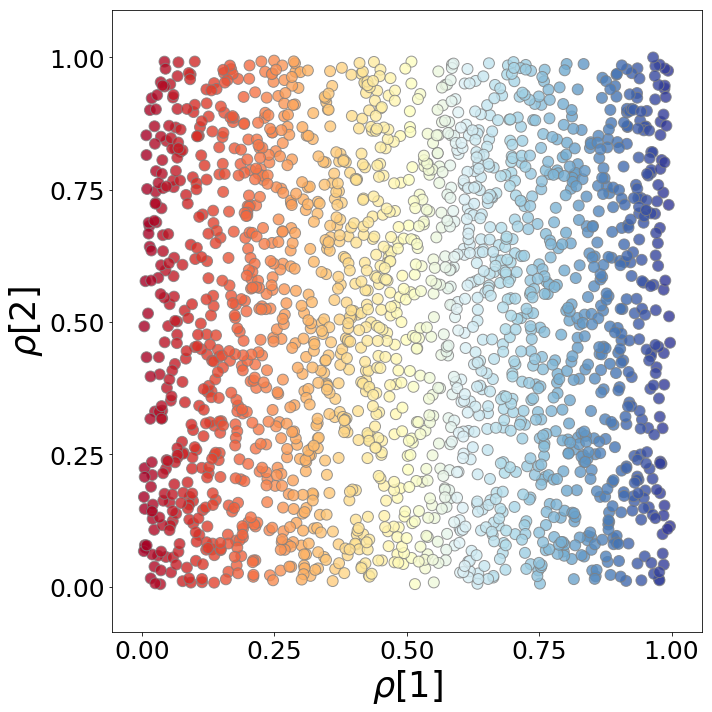

In [13]:
embedding,recon = model.test(y)
R, bias = calibrate_data_b(x,embedding)
calibrated_embedding = np.dot(embedding,R)+bias

f,ax = plt.subplots(1,1,figsize=(10,10))

ax.scatter(x=calibrated_embedding[:,0], y=calibrated_embedding[:,1], s=120, c=x[:,0],alpha=0.8,cmap=plt.cm.get_cmap('RdYlBu'),edgecolors= "grey")
plt.xlabel(r'$\rho[1]$',fontsize=35)
plt.ylabel(r'$\rho[2]$',fontsize=35)


plt.axis('equal')
plt.tick_params(labelsize=25)
plt.locator_params(nbins=5)
plt.tight_layout()

# Fig 3c - Embedding space with clouds

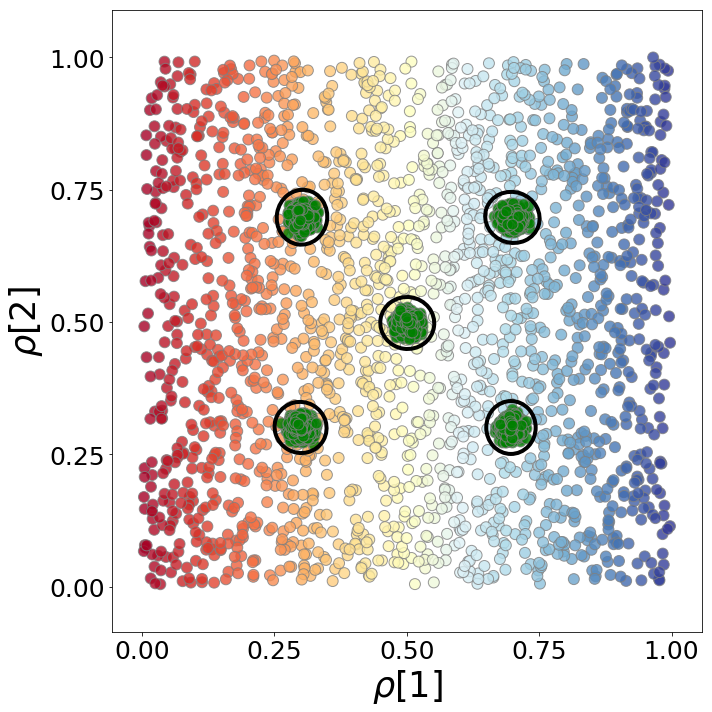

In [14]:
emb_circ,_ = model.test(yCircles[:,:1000,:])
calibrated_emb_circ = np.dot(emb_circ,R)+bias



f,ax = plt.subplots(1,1,figsize=(10,10))

ax.scatter(x=calibrated_embedding[:,0], y=calibrated_embedding[:,1], s=120, c=x[:,0],alpha=0.8,\
           cmap=plt.cm.get_cmap('RdYlBu'),edgecolors= "grey")
ax.scatter(x=calibrated_emb_circ[:,:1000,0], y=calibrated_emb_circ[:,:1000,1], s=120, c='green',\
           alpha=0.8,edgecolors= "grey")


for i in range(5):
    circlesSize[i,:],U = np.linalg.eig(np.cov(calibrated_emb_circ[i,:,:].T))
    circlesAngle[i]= np.arctan2(U[1,0],U[0,0])*360/(2*np.pi)



from matplotlib.patches import Ellipse
for i in range(5):
    e= Ellipse((np.mean(calibrated_emb_circ[i,:,0]),np.mean(calibrated_emb_circ[i,:,1])), 10*np.sqrt(circlesSize[i,0]), \
               10*np.sqrt(circlesSize[i,1]), circlesAngle[i],fill=False, linewidth=4)
    e.set_clip_box(ax.bbox)
    ax.add_artist(e)



plt.xlabel(r'$\rho[1]$',fontsize=35)
plt.ylabel(r'$\rho[2]$',fontsize=35)

plt.axis('equal')
plt.tick_params(labelsize=25)
plt.locator_params(nbins=5)
plt.tight_layout()


# Fig S1b -Diffusion maps

In [15]:
def dm_from_dist(d_in,fac=1,alpha=0.):
    sort_dist=np.sort(d_in)
    epsilon = fac*2*np.max(sort_dist[:,1])
    
    pdx = (d_in.T / epsilon).T
    K0 = np.exp(-1 * pdx)
    
    
    Pmat0= 1.
    if alpha> 1e-8:
        d_sum0=(np.sum(K0,axis=1).reshape(-1,1))**alpha
        Pmat0=np.matmul(d_sum0,np.transpose(d_sum0))
    
    K1=K0/Pmat0
    
    d_sum1=(np.sum(K1,axis=1).reshape(-1,1))**(-1)
    d_sum1=np.diag(d_sum1.reshape(-1))
    P=np.matmul(d_sum1,K1)
    return P

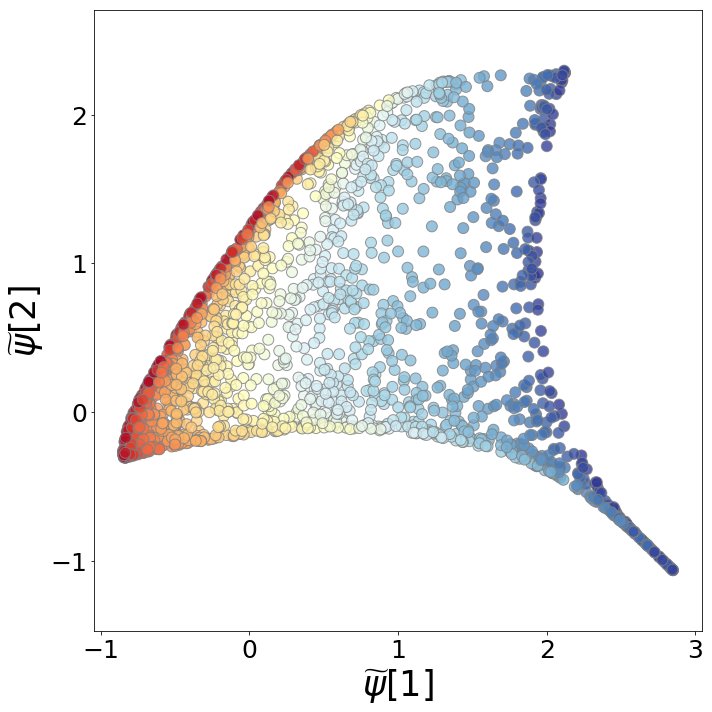

In [16]:
euclidean_dist= scipy.spatial.distance.cdist(y, y,'euclidean')**2
p_euc=dm_from_dist(euclidean_dist, alpha=1.)
p_euc_svd=np.linalg.svd(p_euc)
dm=p_euc_svd[1]*p_euc_svd[0]/(np.matmul(p_euc_svd[0][:,0].reshape(-1,1),np.ones((1,p_euc_svd[0].shape[0])) ))



R_dm, bias_dm = calibrate_data_b(x,dm[:,1:3])
dm_calibrated = np.dot(dm[:,1:3],R_dm)+bias_dm


f,ax = plt.subplots(1,1,figsize=(10,10))
        

ax.scatter(dm_calibrated[:,0],dm_calibrated[:,1], s=120, c=x[:,0],alpha=0.8,\
           cmap=plt.cm.get_cmap('RdYlBu'),edgecolors= "grey")
plt.xlabel('$\widetilde{\psi}[1]$',fontsize=35)
plt.ylabel('$\widetilde{\psi}[2]$',fontsize=35)
plt.tick_params(labelsize=25)
plt.locator_params(nbins=5)
plt.axis('equal')
plt.tight_layout()


# Fig S1c- Anisitropic diffusion maps

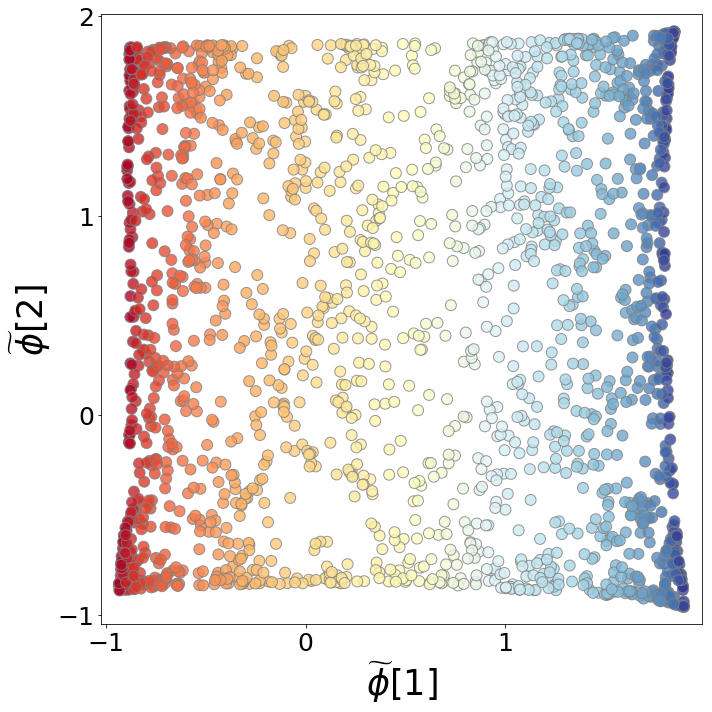

In [17]:
epsilon = 1e-8
mahal_dist=np.zeros((N,N))
for i in range(N):
    cov_i=np.cov(additionalDataY[i,:,:].T) +np.eye(2)*epsilon        
    inv_conv=np.linalg.pinv(cov_i)
    mahal_dist[i,:]=scipy.spatial.distance.cdist(y[[i],:], \
                                                 y[:,:], 'mahalanobis',VI = inv_conv)**2
    
mahal_dist= (mahal_dist+ mahal_dist.T)/2



p_mahal=dm_from_dist(mahal_dist,alpha=1)
p_mahal_svd=np.linalg.svd(p_mahal)
adm=p_mahal_svd[1]*p_mahal_svd[0]/(np.matmul(p_mahal_svd[0][:,0].reshape(-1,1),np.ones((1,p_mahal_svd[0].shape[0])) ))

R_adm, bias_adm = calibrate_data_b(x,adm[:,1:3])
adm_calibrated = np.dot(adm[:,1:3],R_adm)+bias_adm



f,ax = plt.subplots(1,1,figsize=(10,10))
        

ax.scatter(adm_calibrated[:,0],adm_calibrated[:,1], s=120, c=x[:,0],alpha=0.8,\
           cmap=plt.cm.get_cmap('RdYlBu'),edgecolors= "grey")
plt.xlabel('$\widetilde{\phi}[1]$',fontsize=35)
plt.ylabel('$\widetilde{\phi}[2]$',fontsize=35)
plt.tick_params(labelsize=25)
plt.locator_params(nbins=5)
plt.axis('equal')
plt.tight_layout()

# Fig 3d - Compare distances

In [2]:


m=1000
x_dist= scipy.spatial.distance.pdist(x[:m,:])
embd_dist_dm = scipy.spatial.distance.pdist(dm[:m,1:3])
embd_dist_dm_mahal = scipy.spatial.distance.pdist(adm[:m,1:3])
embd_dist_loca = scipy.spatial.distance.pdist(embedding[:m,:])


NameError: name 'scipy' is not defined

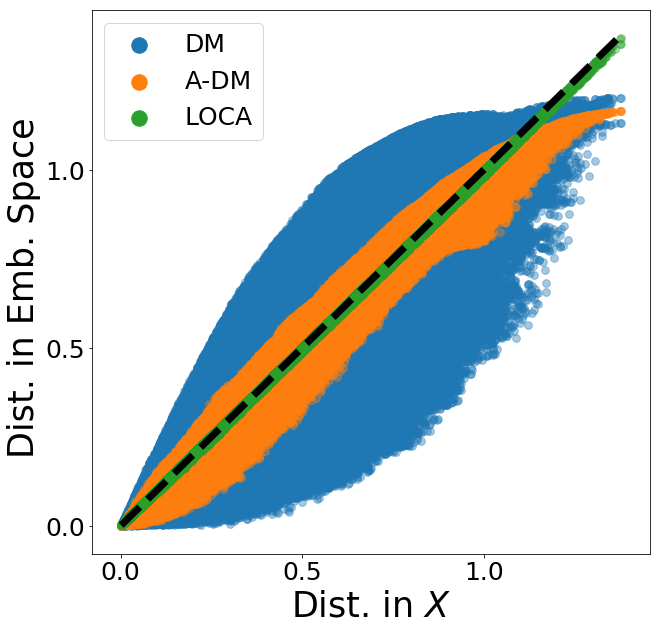

In [19]:
scatterSize= 60

f,ax = plt.subplots(1,1,figsize=(10,10))
plt.scatter(x_dist,(embd_dist_dm*get_calibrate_factor_for_distsA(embd_dist_dm,x_dist)),s=scatterSize,alpha=0.4, label='DM')
plt.scatter(x_dist,(embd_dist_dm_mahal*get_calibrate_factor_for_distsA(embd_dist_dm_mahal,x_dist)),s=scatterSize,alpha=0.4, label='A-DM')
plt.scatter(x_dist,embd_dist_loca,s=scatterSize,alpha=0.4, label='LOCA')
plt.plot([np.min(x_dist), np.max(x_dist)],[np.min(x_dist), np.max(x_dist)],'--',linewidth=7,c='black')


plt.xlabel('Dist. in $X$',fontsize=35)
plt.ylabel(r'Dist. in Emb. Space ',fontsize=35)

plt.tick_params(labelsize=25)


leg = plt.legend(fontsize=25,markerscale=2.,)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
plt.locator_params(nbins=5)



In [20]:
print('MSE:')
print('Calibrated DM: '+str(np.mean((x_dist-embd_dist_dm*get_calibrate_factor_for_distsA(embd_dist_dm,x_dist))**2)))
print('Calibrated ADM: '+str(np.mean((x_dist-embd_dist_dm_mahal*get_calibrate_factor_for_distsA(embd_dist_dm_mahal,x_dist))**2)))
print('LOCA without scaling factor: '+str(np.mean((x_dist-embd_dist_loca)**2)))

MSE:
Calibrated DM: 0.02763783980700101
Calibrated ADM: 0.002612055505967637
LOCA without scaling factor: 2.259740067572737e-05
